Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
sns.set_style("whitegrid")
plt.rc("figure",autolayout=True)
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",titlesize=18,titlepad=10)
plt.rc("animation",html="html5")
import warnings
warnings.filterwarnings("ignore")

Import Data

In [3]:
train_path=r"D:\Resume Projects\Forecasting Sales\train.csv"
test_path=r"D:\Resume Projects\Forecasting Sales\test.csv"

In [4]:
train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

In [5]:
train_df=pd.DataFrame(train_data)
test_df=pd.DataFrame(test_data)

In [6]:
train_df.head(3)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0


In [7]:
test_df.head(3)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
train_df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [11]:
train_df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

Important : Null and 0 are not same in data.   
0 is a value.  
Null means value doesn't exist (data not available).  

In [12]:
test_df.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

Dealing with Date

In [13]:
train_df["date"]=pd.to_datetime(train_df["date"])
test_df["date"]=pd.to_datetime(test_df["date"])

Perform Exploratory Data Analysis

In [14]:
for col in train_df.columns:
    print(col,'---->',train_df[col].nunique())

id ----> 230130
date ----> 2557
country ----> 6
store ----> 3
product ----> 5
num_sold ----> 4037


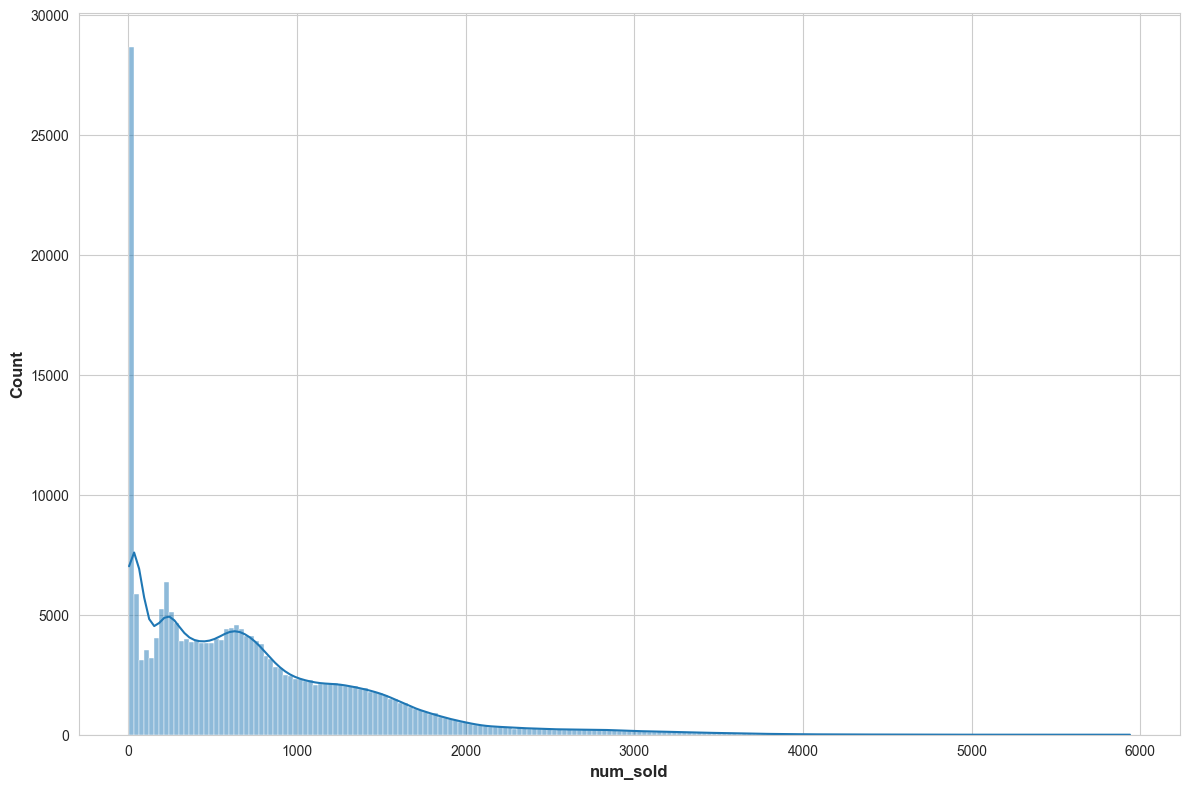

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(train_df["num_sold"], kde=True)
plt.show()

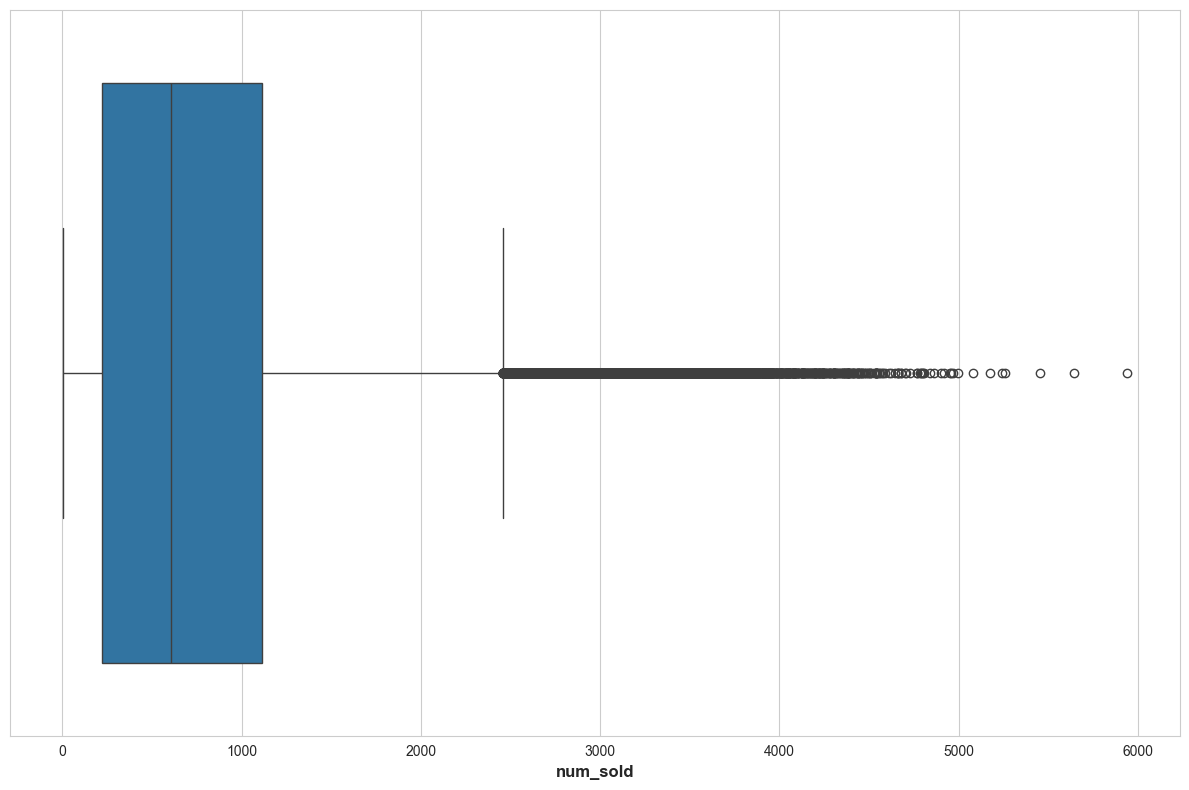

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x=train_df["num_sold"])
plt.show()

Understanding Box Plot  
https://www.geeksforgeeks.org/box-plot/  

In [17]:
train_df["country"].value_counts() 
# Number of rows with each country

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

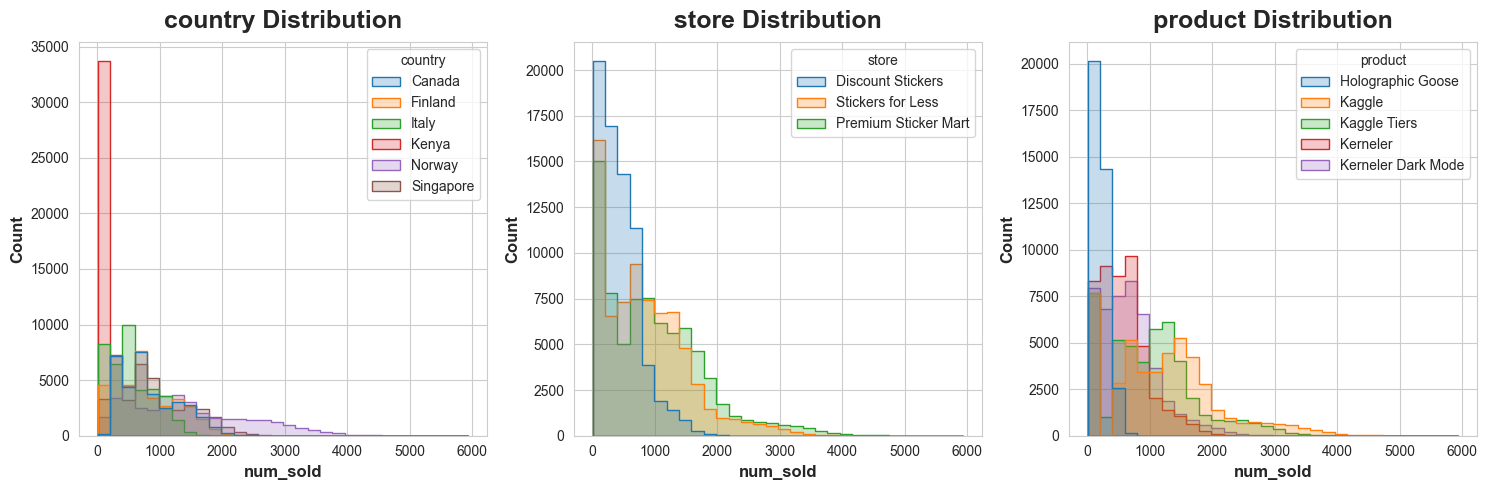

In [18]:
categorical_columns = ['country','store','product']
plt.figure(figsize=(15, 5))

for i,column in enumerate(categorical_columns, 1): # index starts at 1
    plt.subplot(1,3,i)
    sns.histplot(data = train_df, x = "num_sold", hue =column , element ='step', bins=30) # hue -> categories in each column, step for transparent bars
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

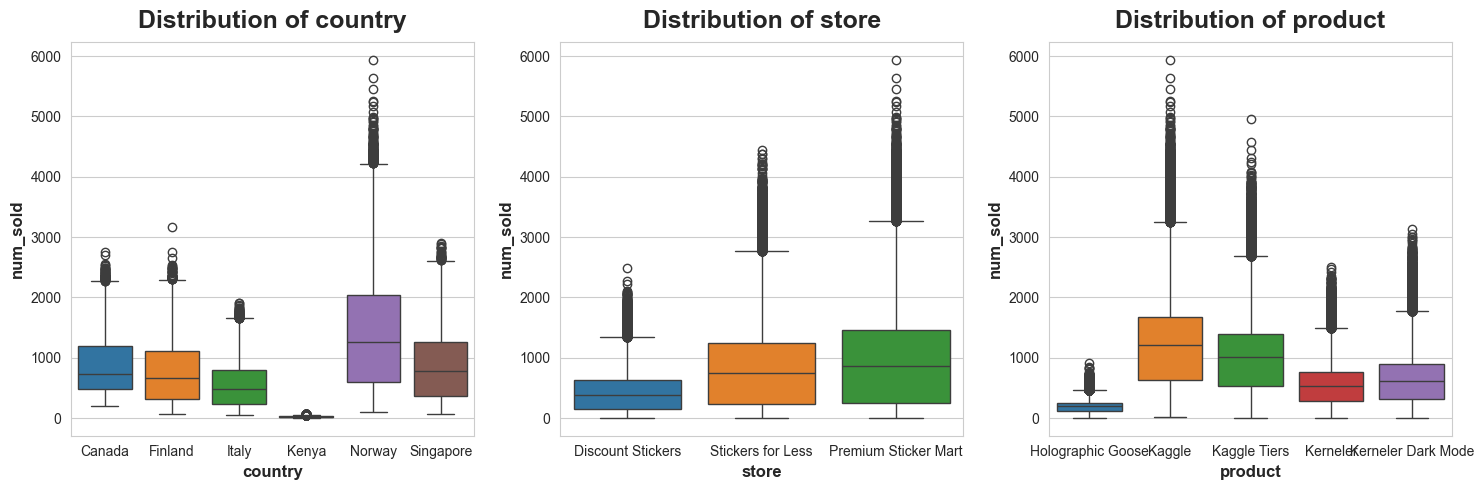

In [19]:
plt.figure(figsize=(15,5))
for i,column in enumerate(categorical_columns, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y = train_df["num_sold"], x =train_df[column] ,hue =train_df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Norway, Premium Sticker Mart, Kaggle, Kaggle Tiers are bringing majority sales.  
Majority outliers also present in them.

In [20]:
train_df.groupby('country')['num_sold'].mean()

country
Canada        840.045003
Finland       748.243306
Italy         542.241403
Kenya          20.431100
Norway       1422.560422
Singapore     863.052379
Name: num_sold, dtype: float64

See above Norway mean proves it.

In [21]:
train_df.groupby('store')['num_sold'].mean()

store
Discount Stickers       427.775887
Premium Sticker Mart    973.836240
Stickers for Less       840.046418
Name: num_sold, dtype: float64

In [22]:
train_df.groupby('product')['num_sold'].mean()

product
Holographic Goose      197.484363
Kaggle                1232.384587
Kaggle Tiers          1018.344110
Kerneler               556.913102
Kerneler Dark Mode     651.042021
Name: num_sold, dtype: float64

Handling Missing Values

In [23]:
train_df['num_sold'] = train_df.groupby('country')['num_sold'].transform(lambda x: x.fillna(x.mean()))

In [24]:
import plotnine as p9 
from plotnine import *

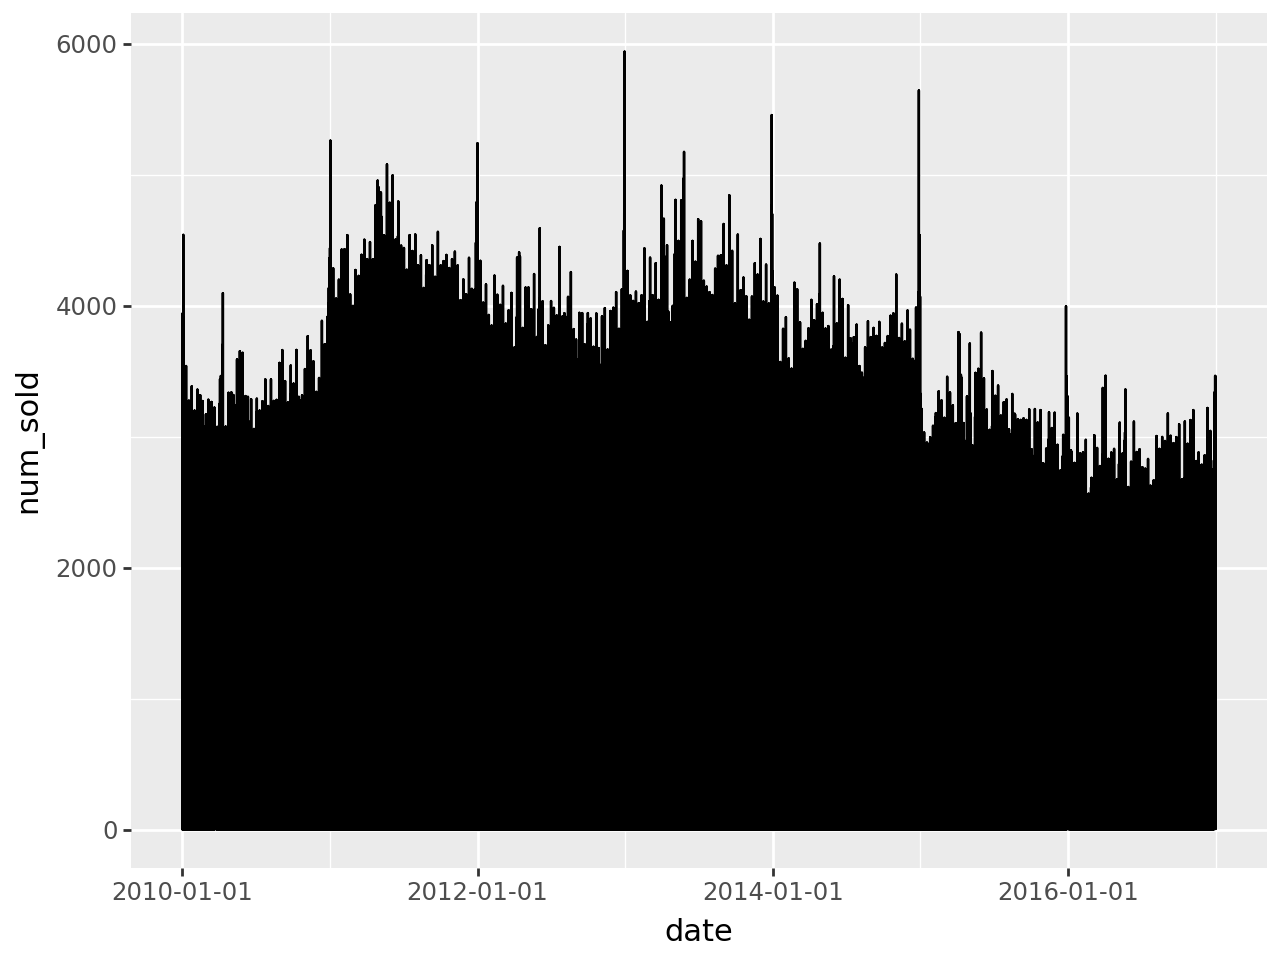

In [25]:
ggplot(train_df, aes(x='date', y='num_sold')) + geom_line()

Time Series Plot

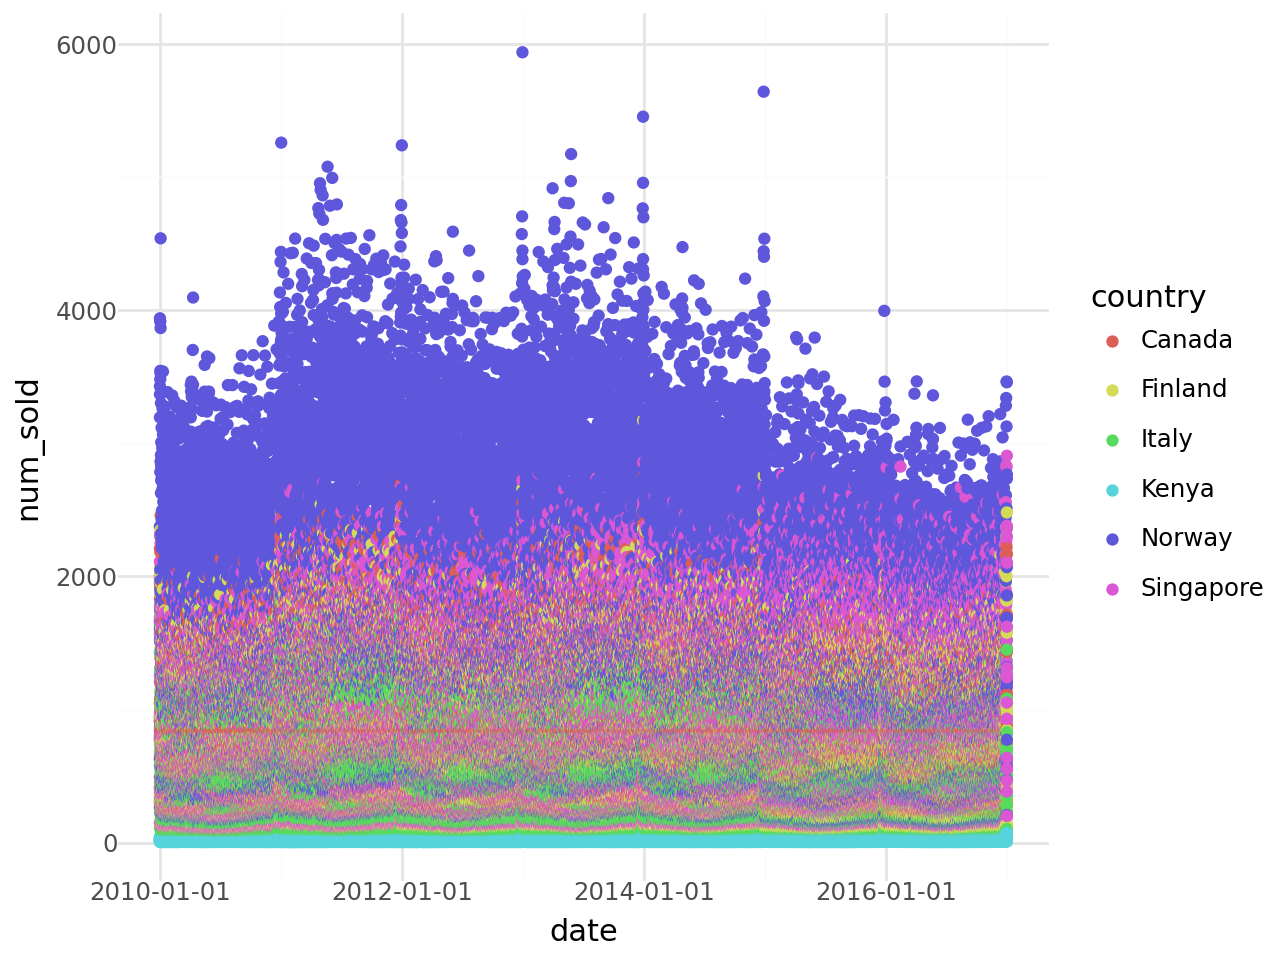

In [26]:
ggplot(train_df, aes(x='date', y='num_sold',group='country' ,color='country'))+geom_point()+ theme_minimal()

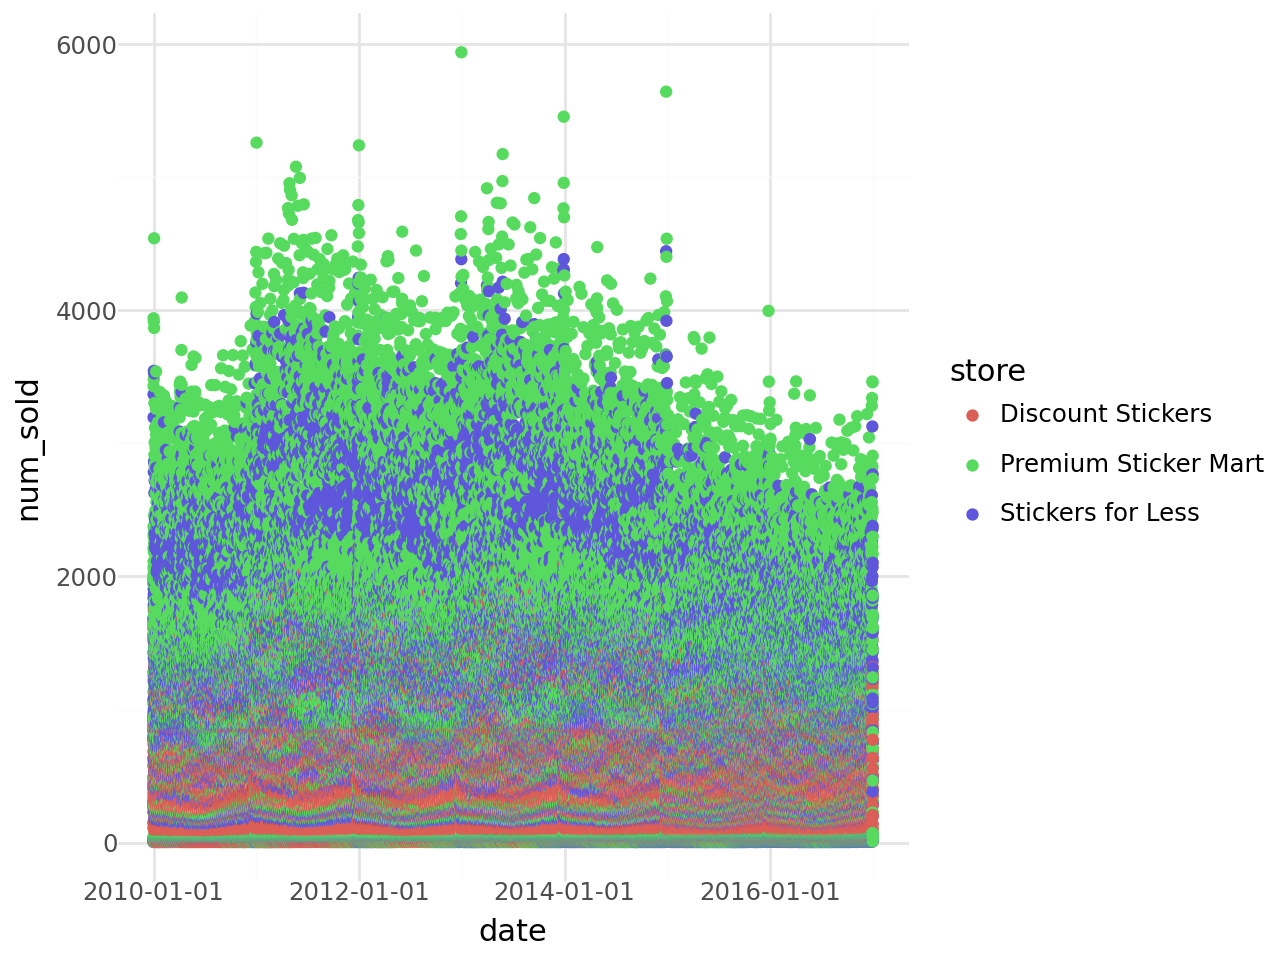

In [27]:
ggplot(train_df, aes(x='date', y='num_sold',group='store' ,color='store'))+geom_point()+ theme_minimal()

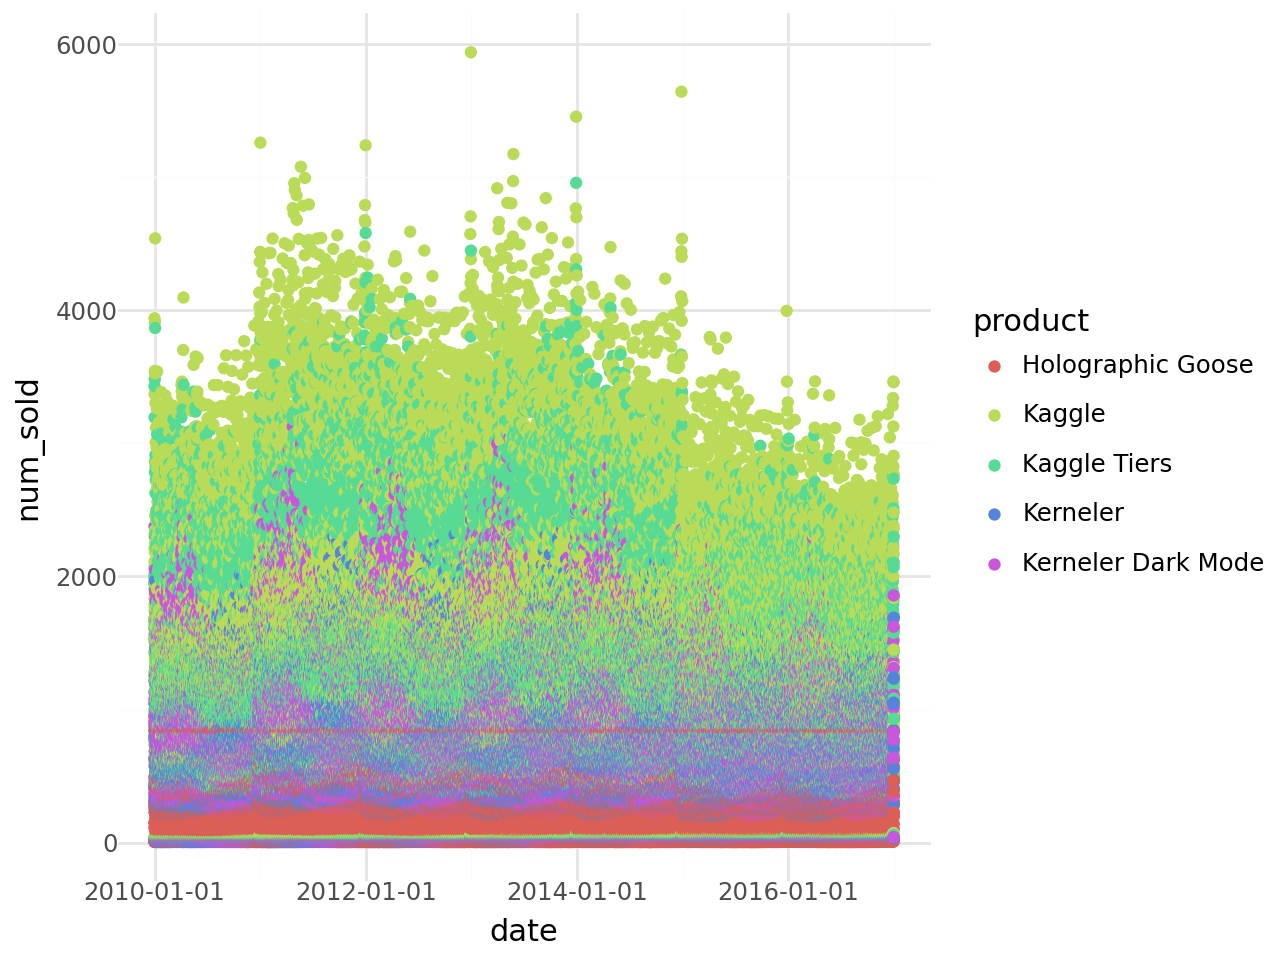

In [28]:
ggplot(train_df, aes(x='date', y='num_sold',group='product' ,color='product'))+geom_point()+ theme_minimal()

Feature engineering for date

In [29]:
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek

In [30]:
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek

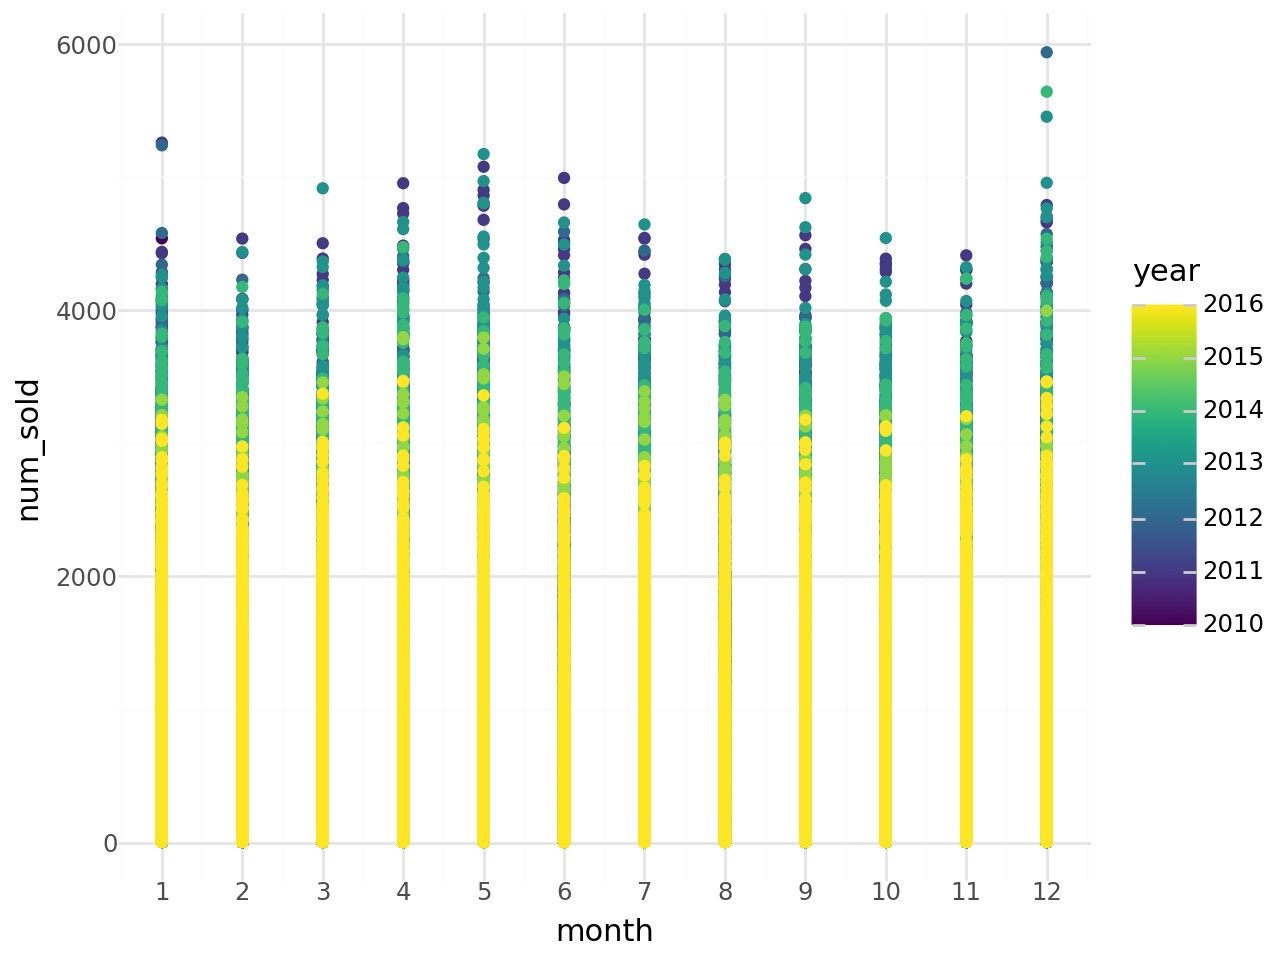

In [31]:
ggplot(train_df, aes(x='month', y='num_sold',group='year' ,color='year'))+geom_point()+scale_x_continuous(breaks=range(1, 13))+ theme_minimal() 

In [32]:
train_df.head(5)

,id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,840.045003,2010,1,1,4
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.000000,2010,1,1,4
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.000000,2010,1,1,4
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.000000,2010,1,1,4
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.000000,2010,1,1,4


Feature Engineering

In [33]:
train_df["holiday"] = 0
test_df["holiday"] = 0

In [34]:
print(train_df["country"].unique())
print(test_df["country"].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']


In [35]:
import holidays

ca_holidays = holidays.country_holidays('CA') # Canada
fi_holidays = holidays.country_holidays('FI') # Finland
it_holidays = holidays.country_holidays('IT') # Italy
ke_holidays = holidays.country_holidays('KE') # Kenya
no_holidays = holidays.country_holidays('NO') # Norway
sg_holidays = holidays.country_holidays('SG') # Singapore

For calculating holidays of various countries.  

In [36]:
def set_holiday(row):
    VAL_HOLIDAY = 1
    if row["country"] == "Canada" and row["date"] in ca_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Finland" and row["date"] in fi_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Italy" and row["date"] in it_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Kenya" and row["date"] in ke_holidays:
        row["holiday"] = VAL_HOLIDAY
    
    elif row["country"] == "Norway" and row["date"] in no_holidays:
        row["holiday"] = VAL_HOLIDAY

    elif row["country"] == "Singapore" and row["date"] in sg_holidays:
        row["holiday"] = VAL_HOLIDAY

    return row

In [37]:
df_train = train_df.apply(set_holiday, axis=1)
df_test = test_df.apply(set_holiday, axis=1)

In [38]:
df_train

,id,date,country,store,product,num_sold,year,month,day,day_of_week,holiday
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,840.045003,2010,1,1,4,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.000000,2010,1,1,4,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.000000,2010,1,1,4,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.000000,2010,1,1,4,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.000000,2010,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.000000,2016,12,31,5,0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.000000,2016,12,31,5,0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.000000,2016,12,31,5,0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.000000,2016,12,31,5,0


applying one hot encoding

In [39]:
df_train_encoded = pd.get_dummies(df_train, columns=['country','store','product'])
df_test_encoded = pd.get_dummies(df_test, columns=['country','store','product'])

Sine Cosine Transformation on date features  

Sine and cosine transformations are commonly used to encode cyclical features, such as dates or times, in machine learning models. Features like months, days of the week, or hours of the day have a natural cyclical nature. For instance, the day after Sunday is Monday, and January follows December.  
Machine learning algorithms often treat numerical features as linear. However, cyclical data should account for the fact that the start and end of a cycle are connected. Sine and cosine transformations project these features into a continuous two-dimensional circular space, preserving their cyclical nature.  



In [40]:
def periodic_transform(dff,variable):
    dff[f"{variable}_SIN"] = np.sin(dff[variable] / dff[variable].max()*2*np.pi)
    dff[f"{variable}_COS"] = np.cos(dff[variable] / dff[variable].max()*2*np.pi)
    return dff

In [41]:
cyclic_col = ['month','day','day_of_week']

for col in cyclic_col:
    df_train_final = periodic_transform(df_train_encoded, col)
    df_test_final = periodic_transform(df_test_encoded, col)

In [42]:
df_train_final.columns

Index(['id', 'date', 'num_sold', 'year', 'month', 'day', 'day_of_week',
       'holiday', 'country_Canada', 'country_Finland', 'country_Italy',
       'country_Kenya', 'country_Norway', 'country_Singapore',
       'store_Discount Stickers', 'store_Premium Sticker Mart',
       'store_Stickers for Less', 'product_Holographic Goose',
       'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode', 'month_SIN', 'month_COS', 'day_SIN',
       'day_COS', 'day_of_week_SIN', 'day_of_week_COS'],
      dtype='object')

In [43]:
df_test_final.columns

Index(['id', 'date', 'year', 'month', 'day', 'day_of_week', 'holiday',
       'country_Canada', 'country_Finland', 'country_Italy', 'country_Kenya',
       'country_Norway', 'country_Singapore', 'store_Discount Stickers',
       'store_Premium Sticker Mart', 'store_Stickers for Less',
       'product_Holographic Goose', 'product_Kaggle', 'product_Kaggle Tiers',
       'product_Kerneler', 'product_Kerneler Dark Mode', 'month_SIN',
       'month_COS', 'day_SIN', 'day_COS', 'day_of_week_SIN',
       'day_of_week_COS'],
      dtype='object')

In [44]:
print(df_train_final.head())

   id       date    num_sold  year  month  day  day_of_week  holiday  \
0   0 2010-01-01  840.045003  2010      1    1            4        1   
1   1 2010-01-01  973.000000  2010      1    1            4        1   
2   2 2010-01-01  906.000000  2010      1    1            4        1   
3   3 2010-01-01  423.000000  2010      1    1            4        1   
4   4 2010-01-01  491.000000  2010      1    1            4        1   

   country_Canada  country_Finland  ...  product_Kaggle  product_Kaggle Tiers  \
0            True            False  ...           False                 False   
1            True            False  ...            True                 False   
2            True            False  ...           False                  True   
3            True            False  ...           False                 False   
4            True            False  ...           False                 False   

   product_Kerneler  product_Kerneler Dark Mode  month_SIN  month_COS  \
0      

Dropping unwanted columns

In [45]:
df_train_final = df_train_final.drop(['month', 'day', 'day_of_week', 'date', 'id'], axis = 1)
df_test_final = df_test_final.drop(['month', 'day', 'day_of_week', 'date', 'id'], axis = 1)

In [ ]:
df_train_final.columns

Index(['num_sold', 'year', 'holiday', 'country_Canada', 'country_Finland',
       'country_Italy', 'country_Kenya', 'country_Norway', 'country_Singapore',
       'store_Discount Stickers', 'store_Premium Sticker Mart',
       'store_Stickers for Less', 'product_Holographic Goose',
       'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode', 'month_SIN', 'month_COS', 'day_SIN',
       'day_COS', 'day_of_week_SIN', 'day_of_week_COS'],
      dtype='object')

In [47]:
numeric_df = df_train_final.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

In [48]:
print(corr_matrix['num_sold'].sort_values(ascending = False).to_string())

num_sold           1.000000
day_of_week_COS    0.038614
month_SIN          0.014153
holiday            0.011922
day_COS            0.008640
day_SIN            0.002841
month_COS          0.001278
year              -0.031638
day_of_week_SIN   -0.032435


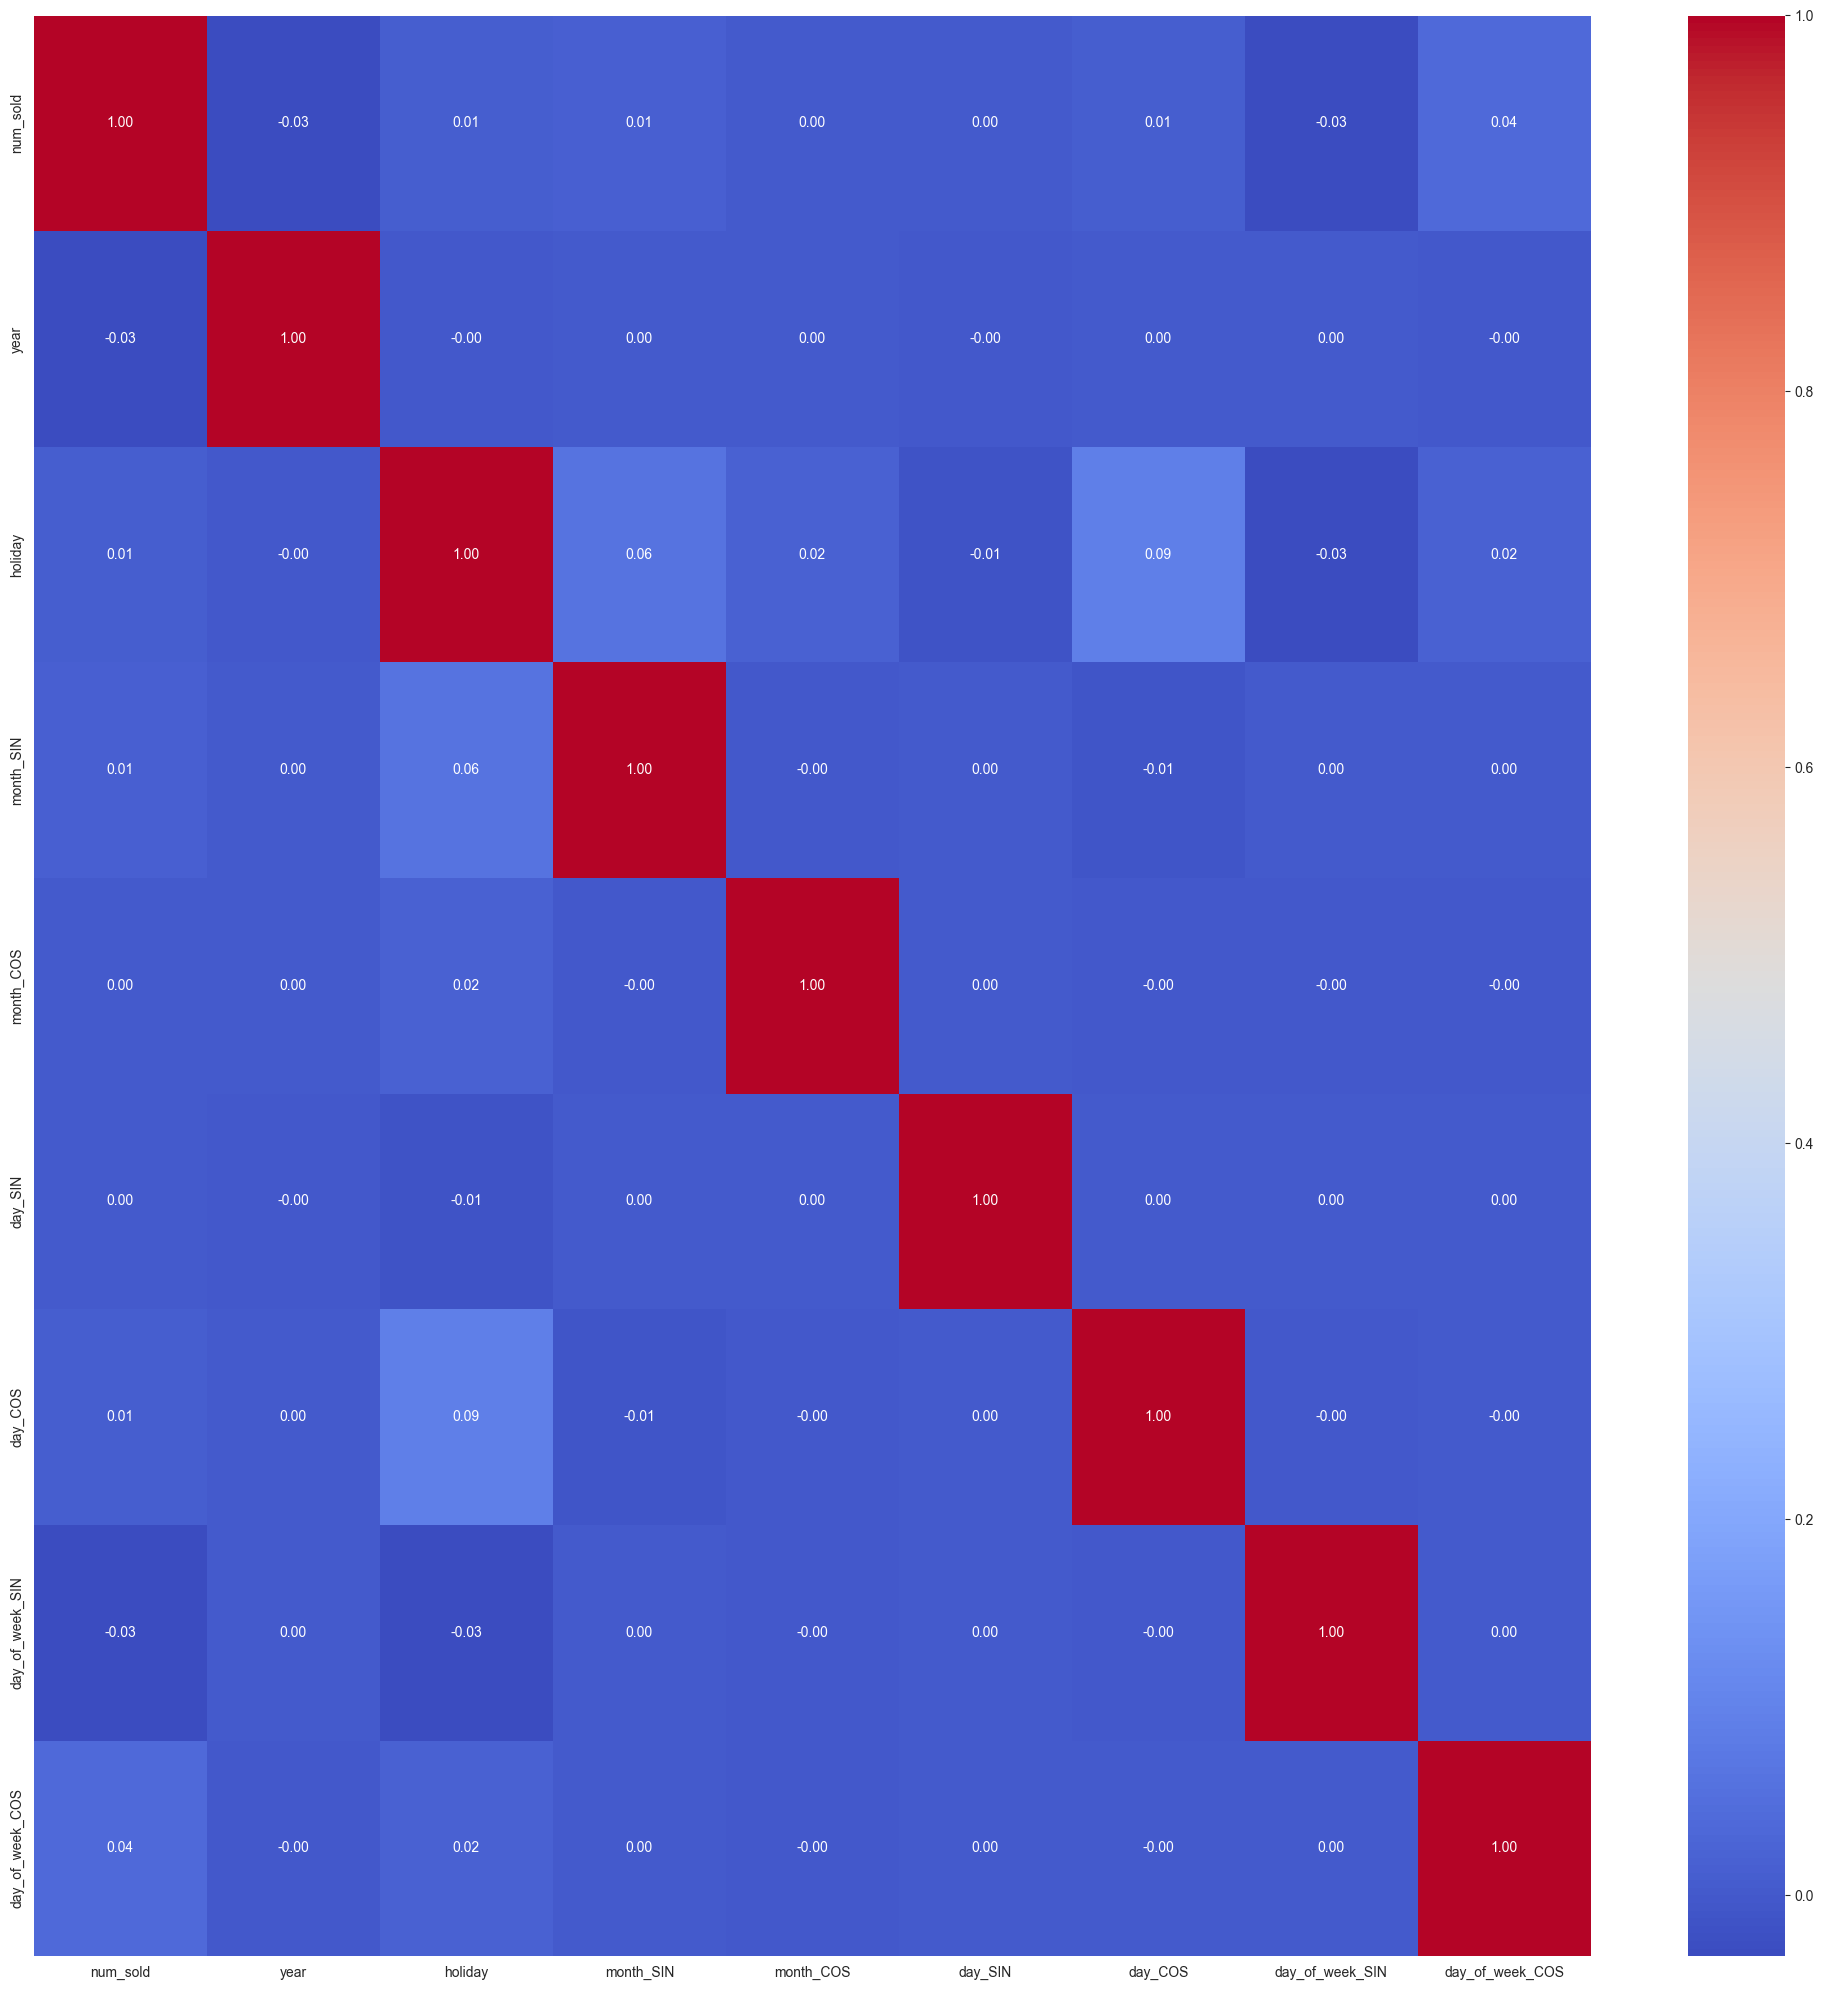

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

In [50]:
x = df_train_final.drop(['num_sold'],axis =1)
y = df_train_final['num_sold']

Splitting data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

Applying min max scaler

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

Deploying model

In [55]:
def model_acc(model):
    model.fit(x_train_scaled,y_train)
    acc = model.score(x_test_scaled,y_test)
    print(str(model)+'-->'+str(acc))

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

DecisionTreeRegressor()-->0.953814052032841
RandomForestRegressor()-->0.9732783115538821


Evaluating model for decision tree

In [57]:
y_test_pred = dt.predict(x_test_scaled)
y_test = y_test.values.flatten()
y_test_pred = y_test_pred.flatten()
final_df1 = pd.DataFrame(np.hstack((y_test_pred[:, np.newaxis], y_test[:, np.newaxis])), columns=['Prediction', 'Real'])

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [59]:
acc_train_dt = dt.score(x_train_scaled,y_train)
print("Model Score on Train set :",acc_train_dt)
print("Model Score on Test set :",dt.score(x_test_scaled,y_test))

Model Score on Train set : 1.0
Model Score on Test set : 0.953814052032841


In [60]:
print(f'MAE: {mean_absolute_error(final_df1["Prediction"],final_df1["Real"])}')
print(f'MSE: {mean_squared_error(final_df1["Prediction"],final_df1["Real"])}')
print(f'RMSE: {np.sqrt(mean_squared_error(final_df1["Prediction"],final_df1["Real"]))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)}')

MAE: 78.87740000108248
MSE: 21767.772002736834
RMSE: 147.539052466582
MAPE: 0.11435543694393703


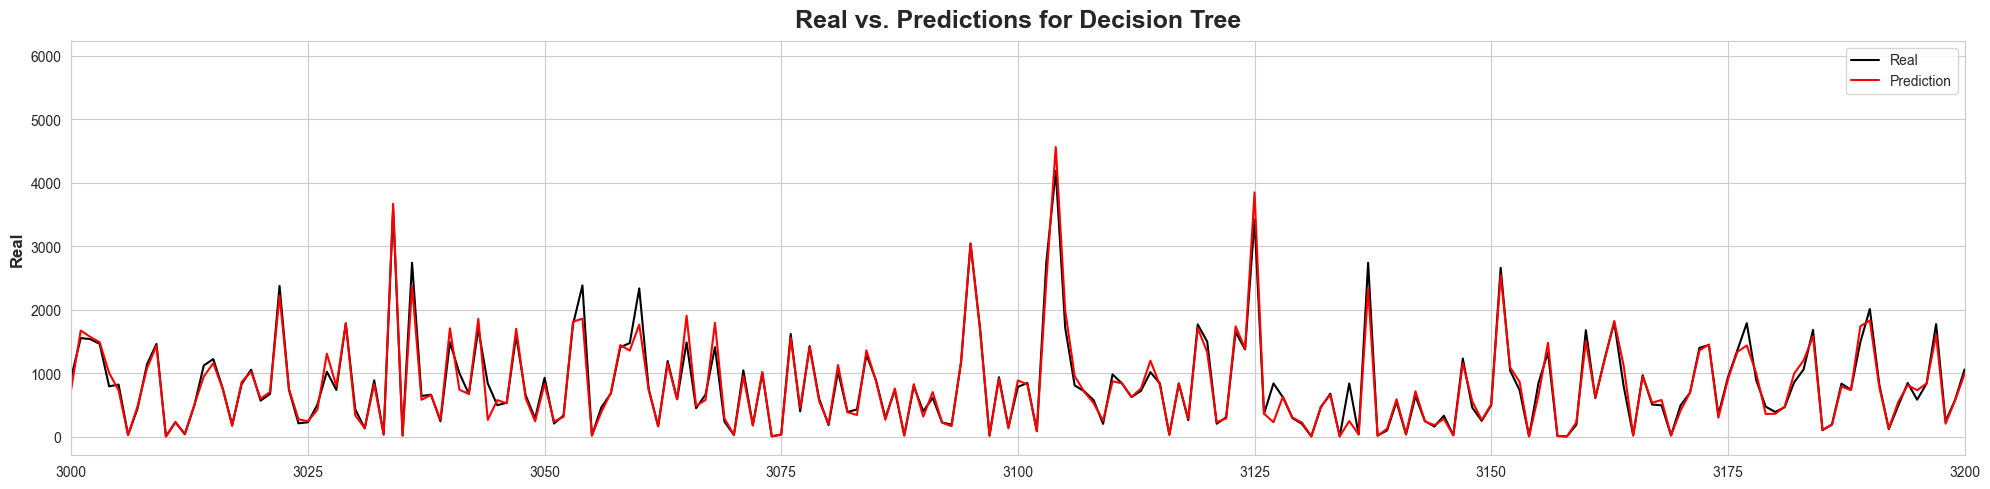

In [61]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=range(len(final_df1['Real'])) ,y=final_df1['Real'],color='black',label='Real')
sns.lineplot(x=range(len(final_df1['Prediction'])),y=final_df1['Prediction'],color='red',label='Prediction')
ax.set_xlim([3000,3200])
plt.title('Real vs. Predictions for Decision Tree')
plt.show()

Model Evaluation for Random Forest

In [62]:
y_test_pred = rf.predict(x_test_scaled)
y_test_pred = y_test_pred.flatten()
final_df2 = pd.DataFrame(np.hstack((y_test_pred[:, np.newaxis], y_test[:, np.newaxis])), columns=['Prediction', 'Real'])

In [63]:
acc_train = rf.score(x_train_scaled,y_train)
print(acc_train)

0.9963357435094998


In [64]:
print(f'MAE: {mean_absolute_error(final_df2["Prediction"],final_df2["Real"])}')
print(f'MSE: {mean_squared_error(final_df2["Prediction"],final_df2["Real"])}')
print(f'RMSE: {np.sqrt(mean_squared_error(final_df1["Prediction"],final_df1["Real"]))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)}')

MAE: 61.21199331213041
MSE: 12594.125426133165
RMSE: 147.539052466582
MAPE: 0.0912914415569493


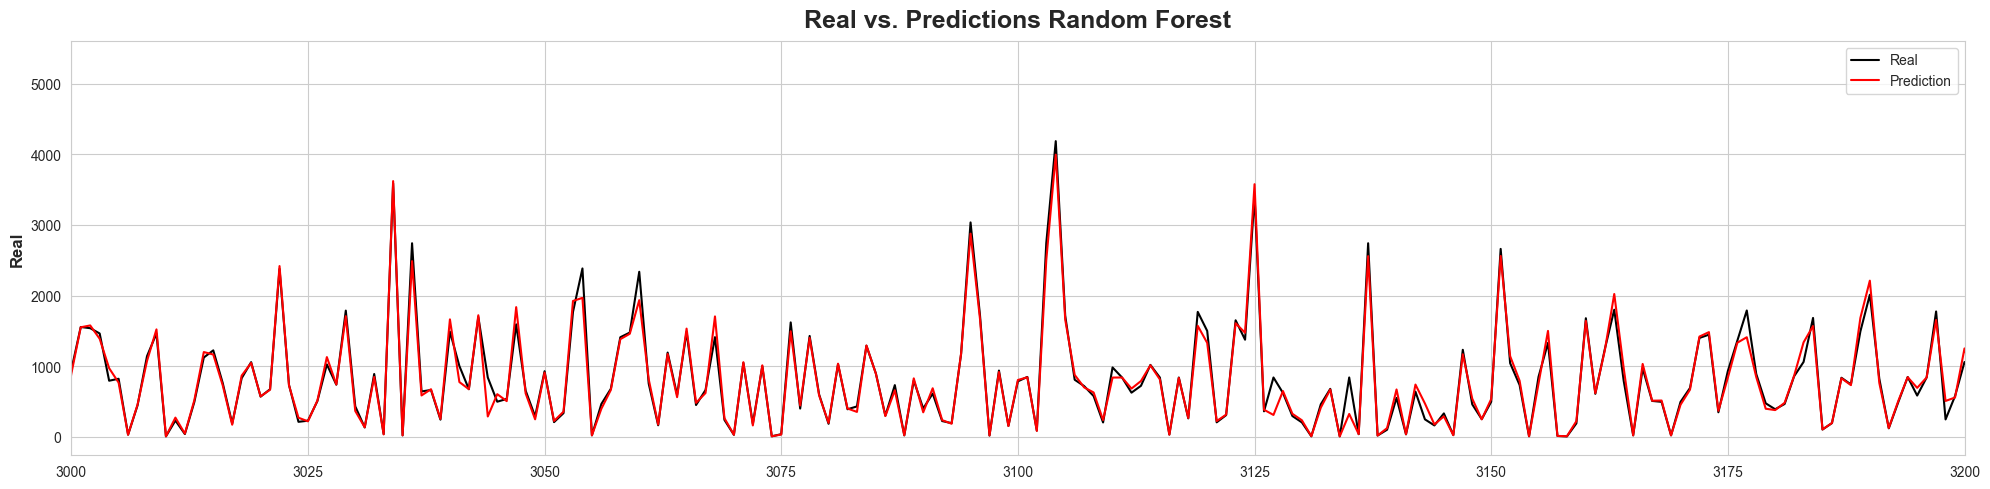

In [66]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=range(len(final_df2['Real'])) ,y=final_df2['Real'],color='black',label='Real')
sns.lineplot(x=range(len(final_df2['Prediction'])),y=final_df2['Prediction'],color='red',label='Prediction')
ax.set_xlim([3000,3200])
plt.title('Real vs. Predictions Random Forest')
plt.show()

XGBoost

In [68]:
import xgboost as xgb

In [69]:
train_data = xgb.DMatrix(x_train_scaled, label=y_train)
test_data = xgb.DMatrix(x_test_scaled, label=y_test)

In [70]:
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'learning_rate': 0.1,  # Step size shrinkage
    'max_depth': 5,  # Maximum depth of a tree
    'alpha': 10,  # L1 regularization term on weights
    'n_estimators': 100  # Number of boosting rounds (trees)
}

In [71]:
model_xgb = xgb.train(params, train_data, num_boost_round=100)

In [72]:
y_pred = model_xgb.predict(test_data)

In [73]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')

MAE: 66.76353270542835
MSE: 11639.94868871332
RMSE: 107.88859387680108
MAPE: 0.31749550459464304
